In [262]:
import torch
import os
import sys
import csv
import pandas as pd
from tqdm import tqdm
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt, figure
import math
import seaborn as sns
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
   
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# %  matplotlib inline

In [3]:
df_dataset = pd.read_csv('Dataset.data', sep=' ')

In [4]:
df_dataset

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df_dataset.dtypes

age                int64
workplace         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
df_dataset.count()

age               48842
workplace         48842
fnlwgt            48842
education         48842
education_num     48842
marital_status    48842
occupation        48842
relationship      48842
race              48842
sex               48842
capital_gain      48842
capital_loss      48842
hours_per_week    48842
native_country    48842
income            48842
dtype: int64

In [7]:
df_dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [288]:
df = df_dataset.groupby('relationship').nunique()
for column in df_dataset.select_dtypes('object'):
    print('Number of categories in ', column,' are:', len(df_dataset.groupby(column).nunique()))

Number of categories in  workplace  are: 7
Number of categories in  education  are: 16
Number of categories in  marital_status  are: 7
Number of categories in  occupation  are: 14
Number of categories in  relationship  are: 6
Number of categories in  race  are: 5
Number of categories in  sex  are: 2
Number of categories in  native_country  are: 41
Number of categories in  income  are: 2


In [8]:
for i in df_dataset.columns:
    print('missing values in ',i,' column:', df_dataset.loc[df_dataset[i]=='?', i].size)

missing values in  age  column: 0
missing values in  workplace  column: 2799
missing values in  fnlwgt  column: 0
missing values in  education  column: 0
missing values in  education_num  column: 0
missing values in  marital_status  column: 0
missing values in  occupation  column: 2809
missing values in  relationship  column: 0
missing values in  race  column: 0
missing values in  sex  column: 0
missing values in  capital_gain  column: 0
missing values in  capital_loss  column: 0
missing values in  hours_per_week  column: 0
missing values in  native_country  column: 857
missing values in  income  column: 0


/home/bayeslabs/.local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
indexNames = df_dataset[ df_dataset['workplace'] == '?' ].index
df_dataset.drop(indexNames , inplace=True)
indexNames = df_dataset[ df_dataset['occupation'] == '?' ].index
df_dataset.drop(indexNames , inplace=True)
indexNames = df_dataset[ df_dataset['native_country'] == '?' ].index
df_dataset.drop(indexNames , inplace=True)


In [10]:
df_dataset.count()

age               45222
workplace         45222
fnlwgt            45222
education         45222
education_num     45222
marital_status    45222
occupation        45222
relationship      45222
race              45222
sex               45222
capital_gain      45222
capital_loss      45222
hours_per_week    45222
native_country    45222
income            45222
dtype: int64

In [11]:
len(df_dataset.loc[((df_dataset['workplace']=='Private')&(df_dataset['income']=='<=50K')), :])

26056

In [266]:
def printmd(string):
    display(Markdown(string))

## Income count

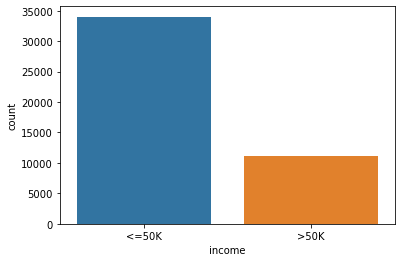

In [269]:
sns.countplot(df_dataset.income)
printmd('## Income count')

## Gender count

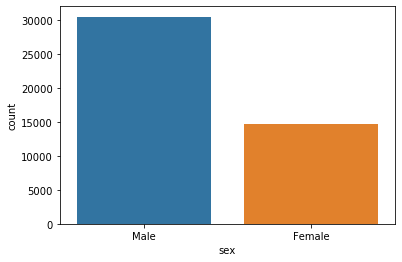

In [271]:
sns.countplot(df_dataset.sex)
printmd('## Gender count')

## Age Vs Avg_working_hours

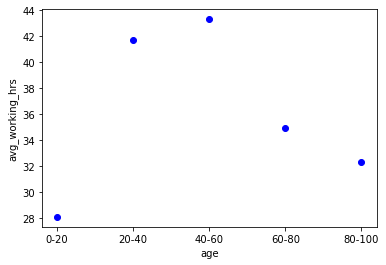

In [274]:
printmd('## Age Vs Avg_working_hours')
df_age = list(df_dataset['age'])
df_hrs = list(df_dataset['hours_per_week'])
age_hrs = {'0-20':[],'20-40':[],'40-60':[],'60-80':[],'80-100':[]}
for i in range(len(df_age)):
    if df_age[i]<=20:
        age_hrs['0-20'].append(df_hrs[i])
    elif df_age[i]>20 and df_age[i]<=40:
        age_hrs['20-40'].append(df_hrs[i])
    elif df_age[i]>40 and df_age[i]<=60:
        age_hrs['40-60'].append(df_hrs[i])
    elif df_age[i]>60 and df_age[i]<=80:
        age_hrs['60-80'].append(df_hrs[i])
    else:
        age_hrs['80-100'].append(df_hrs[i])
        

#age_in_range and avg_working_hours
avg_age = [key for key, value in age_hrs.items()]
avg_hrs = [np.mean(value) for key, value in age_hrs.items()]
plt.xlabel('age')
plt.ylabel('avg_working_hrs')
plt.plot(avg_age, avg_hrs, 'bo')
plt.show()

## Workplace Vs Avg_working_hours

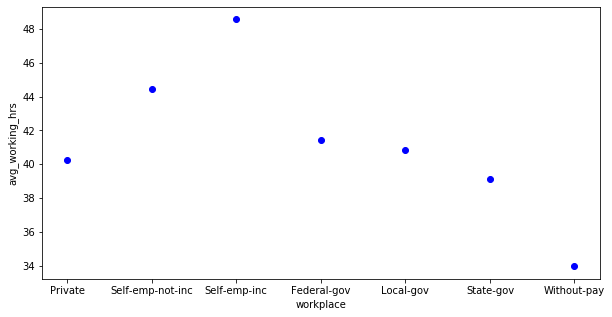

In [275]:
printmd('## Workplace Vs Avg_working_hours')
work_class = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay']
#, 'Never-worked'
work_class_hrs = {}
df_work_class = list(df_dataset['workplace'])
for i in range(len(df_work_class)):
    if df_work_class[i] not in work_class_hrs.keys():
        work_class_hrs[df_work_class[i]]=[]
    work_class_hrs[df_work_class[i]].append(df_hrs[i])
avg_work_hrs_class = [np.mean(work_class_hrs[i]) for i in work_class]
plt.xlabel('workplace')
plt.ylabel('avg_working_hrs')
plt.plot(work_class, avg_work_hrs_class, 'bo')
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()
    

## Race Vs Avg_Education

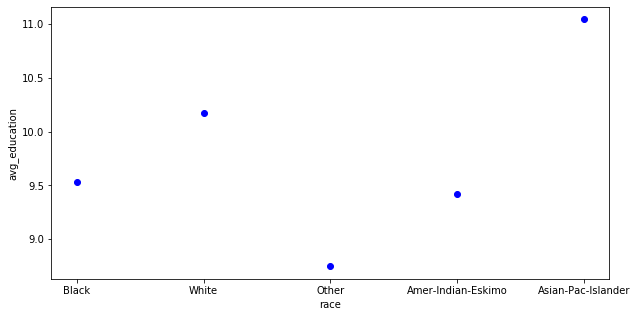

In [276]:
printmd('## Race Vs Avg_Education')
df_race = list(df_dataset['race'])
df_edu_num = list(df_dataset['education_num'])
race_edu = {}
for i in range(len(df_race)):
    if df_race[i] not in race_edu.keys():
        race_edu[df_race[i]] = []
    race_edu[df_race[i]].append(df_edu_num[i])
races = [key for key in race_edu.keys()]
avg_race_edu = [np.mean(value) for key, value in race_edu.items()]

plt.xlabel('race')
plt.ylabel('avg_education')
plt.plot(races, avg_race_edu, 'bo')
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()


## Country Vs Avg_education

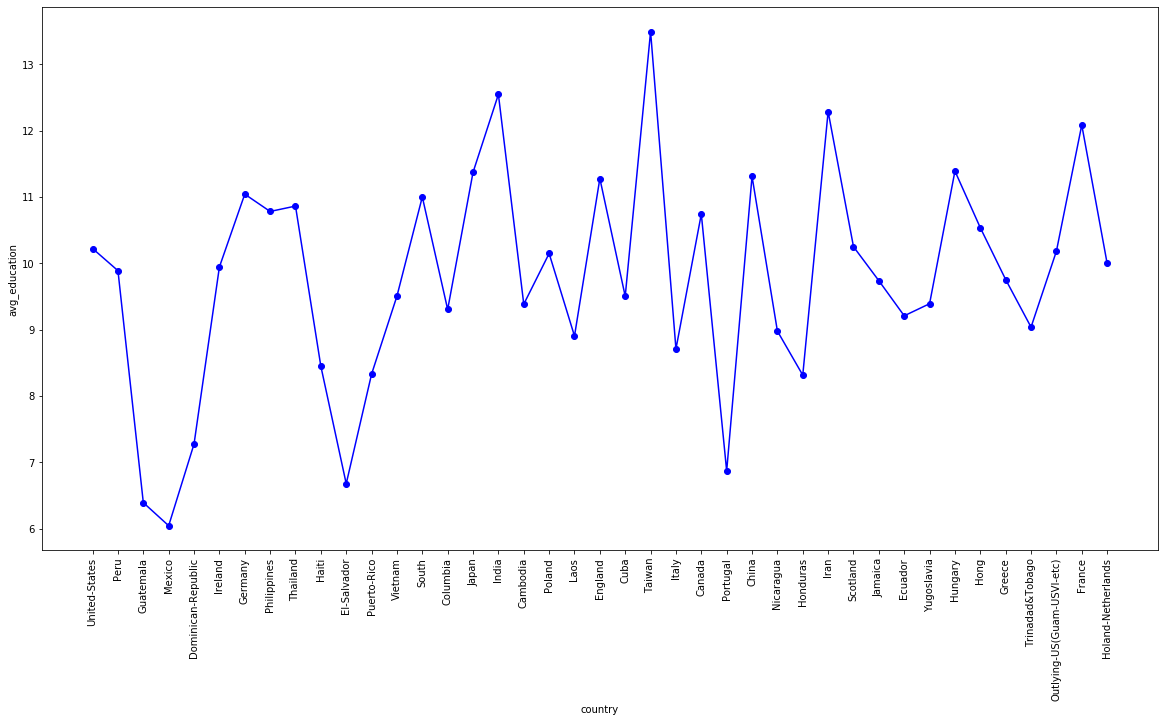

In [295]:
printmd('## Country Vs Avg_education')
df_native_country = list(df_dataset['native_country'])
country_edu = {}
for i in range(len(df_native_country)):
    if df_native_country[i] not in country_edu.keys():
        country_edu[df_native_country[i]] = []
    country_edu[df_native_country[i]].append(df_edu_num[i])
native_countries = [key for key in country_edu.keys()]
avg_country_edu = [np.mean(value) for key, value in country_edu.items()]
plt.xlabel('country')
plt.ylabel('avg_education')
plt.plot(native_countries, avg_country_edu, 'bo-')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)

plt.show()

## Education Vs Avg_working_hours

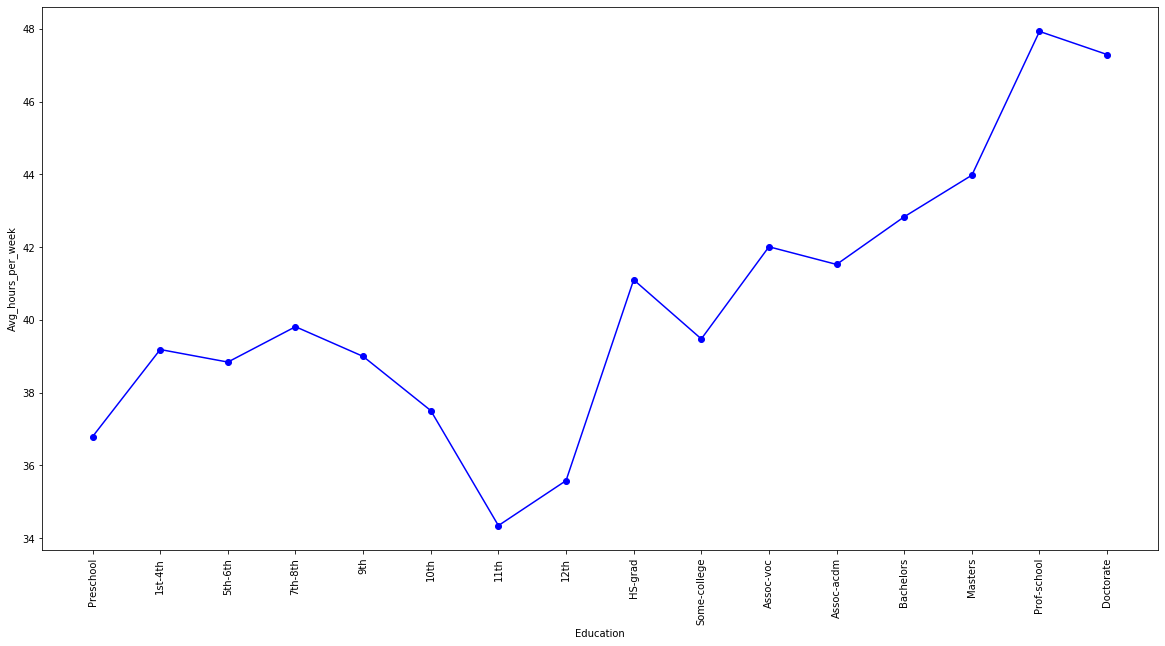

In [296]:
printmd('## Education Vs Avg_working_hours')
df_edu = list(df_dataset['education'])
edu_hrs = {}
for i in range(len(df_edu)):
    if df_edu[i] not in edu_hrs.keys():
        edu_hrs[df_edu[i]]=[]
    edu_hrs[df_edu[i]].append(df_hrs[i])
# avg_hrs_per_week = [np.mean(value) for key, value in edu_hrs.items()]
edu_edu_num = {}
for i in range(len(df_edu)):
    edu_edu_num[df_edu[i]]=df_edu_num[i]
edu_edu_num = {k: v for k, v in sorted(edu_edu_num.items(), key=lambda item: item[1])}
edu = [key for key in edu_edu_num.keys()]
avg_hrs_per_week = [np.mean(edu_hrs[i]) for i in edu]
    
plt.xlabel('Education')
plt.ylabel('Avg_hours_per_week')
plt.plot(edu, avg_hrs_per_week, 'bo-')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)

plt.show()

In [255]:
len(edu)

16

In [208]:
len(work_class_hrs)

7

## Country Vs Gender_propotion

Text(0, 0.5, 'Proportion of population')

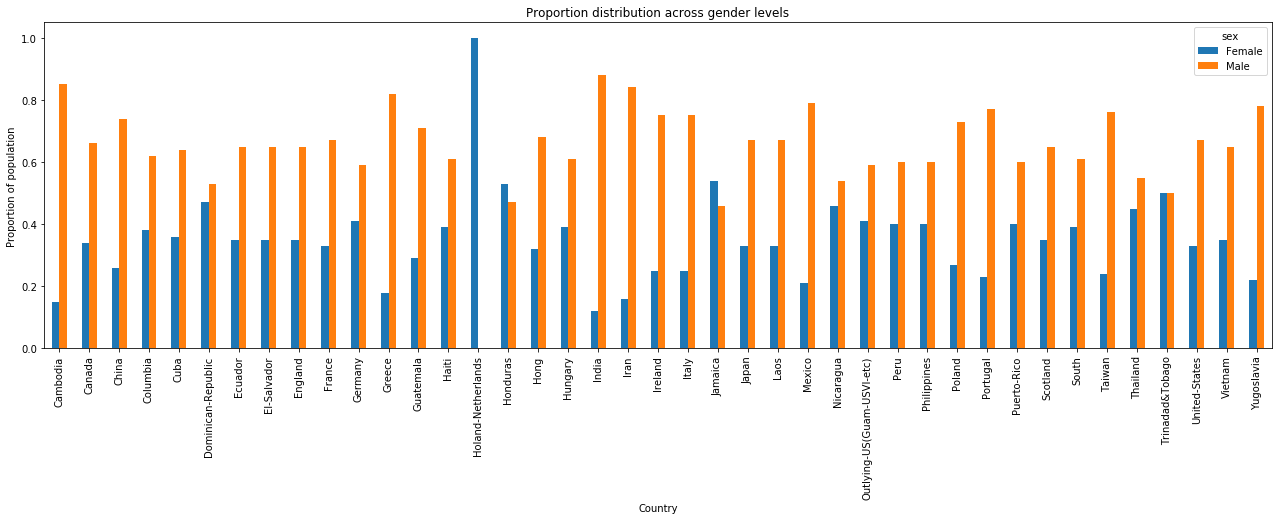

In [279]:
printmd('## Country Vs Gender_propotion')
gender = round(pd.crosstab(df_dataset.native_country, df_dataset.sex).div(pd.crosstab(df_dataset.native_country, df_dataset.sex).apply(sum,1),0),2)
# gender.sort_values(by = 'Private', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels', figsize = (22,6))
ax.set_xlabel('Country')
ax.set_ylabel('Proportion of population')

## Gender Propotion Based on Income

Text(0, 0.5, 'Proportion of population')

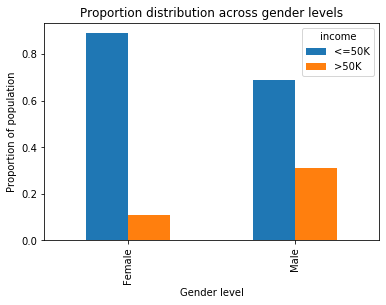

In [280]:
printmd('## Gender Propotion Based on Income')
gender = round(pd.crosstab(df_dataset.sex, df_dataset.income).div(pd.crosstab(df_dataset.sex, df_dataset.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

## Education and Income level

Text(0, 0.5, 'Proportion of population')

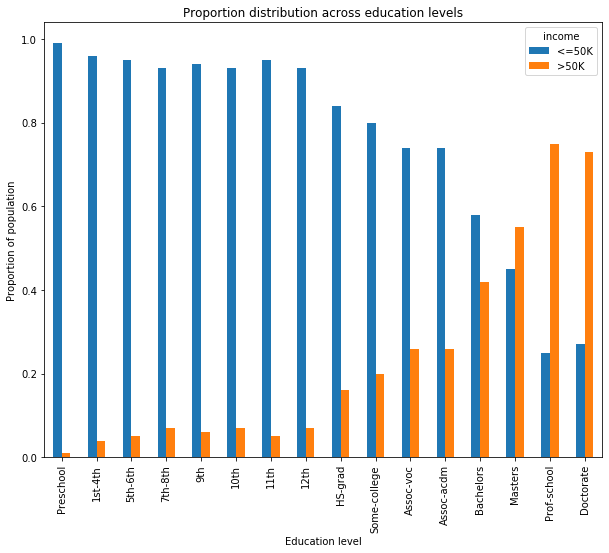

In [299]:
printmd('## Education and Income level')
edu_level = {}
for x,y in df_dataset[['education_num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x
education = round(pd.crosstab(df_dataset.education, df_dataset.income).div(pd.crosstab(df_dataset.education, df_dataset.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')


## Workclass and Income

Text(17.200000000000003, 0.5, 'Proportion of population')

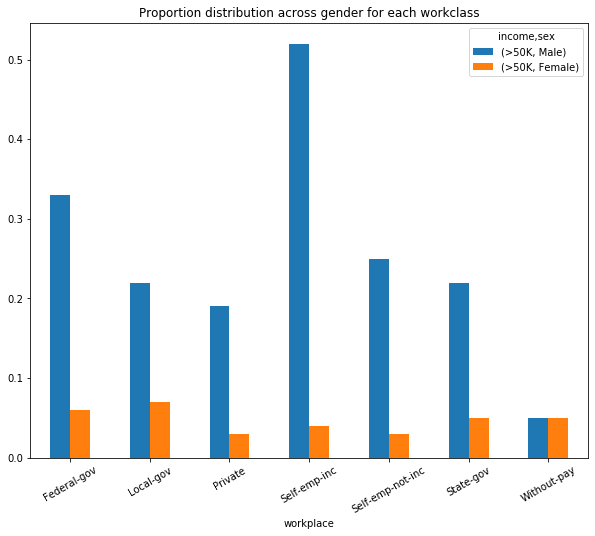

In [300]:
printmd('## Workclass and Income')
gender_workclass = round(pd.crosstab(df_dataset.workplace, [df_dataset.income, df_dataset.sex]).div(pd.crosstab(df_dataset.workplace, [df_dataset.income, df_dataset.sex]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

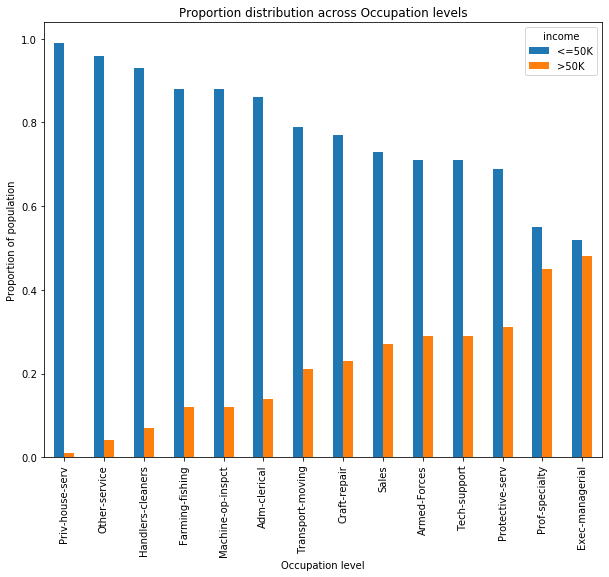

In [54]:
occupation = round(pd.crosstab(df_dataset.occupation, df_dataset.income).div(pd.crosstab(df_dataset.occupation, df_dataset.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

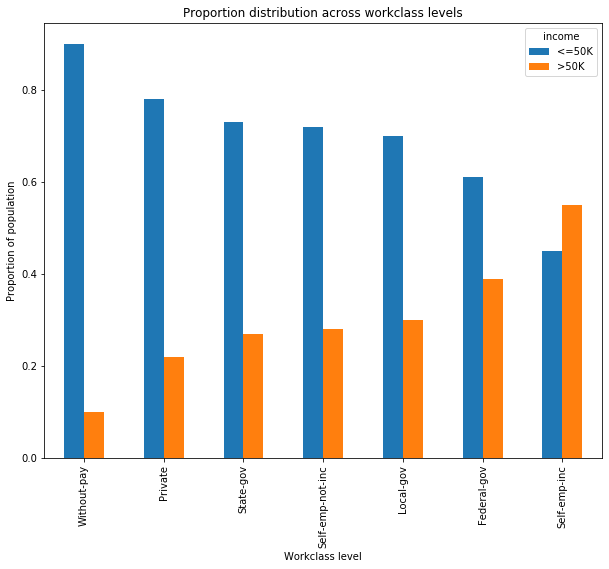

In [56]:
workclass = round(pd.crosstab(df_dataset.workplace, df_dataset.income).div(pd.crosstab(df_dataset.workplace, df_dataset.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

## Race and Income

Text(0, 0.5, 'Proportion of population')

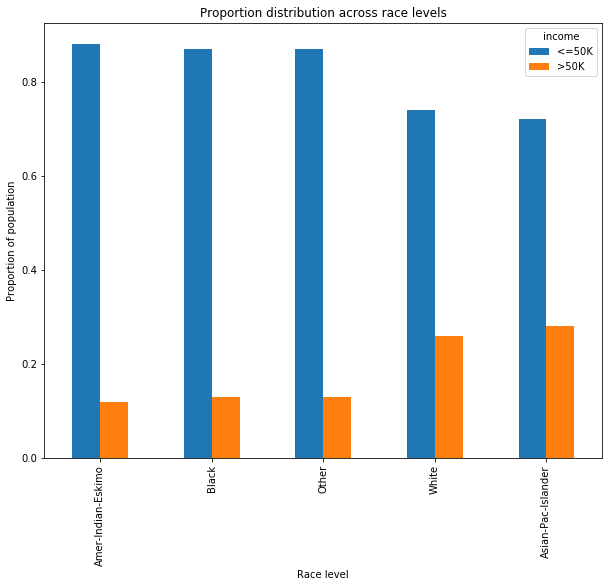

In [301]:
printmd('## Race and Income')
race = round(pd.crosstab(df_dataset.race, df_dataset.income).div(pd.crosstab(df_dataset.race, df_dataset.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')


Text(0, 0.5, 'Proportion of population')

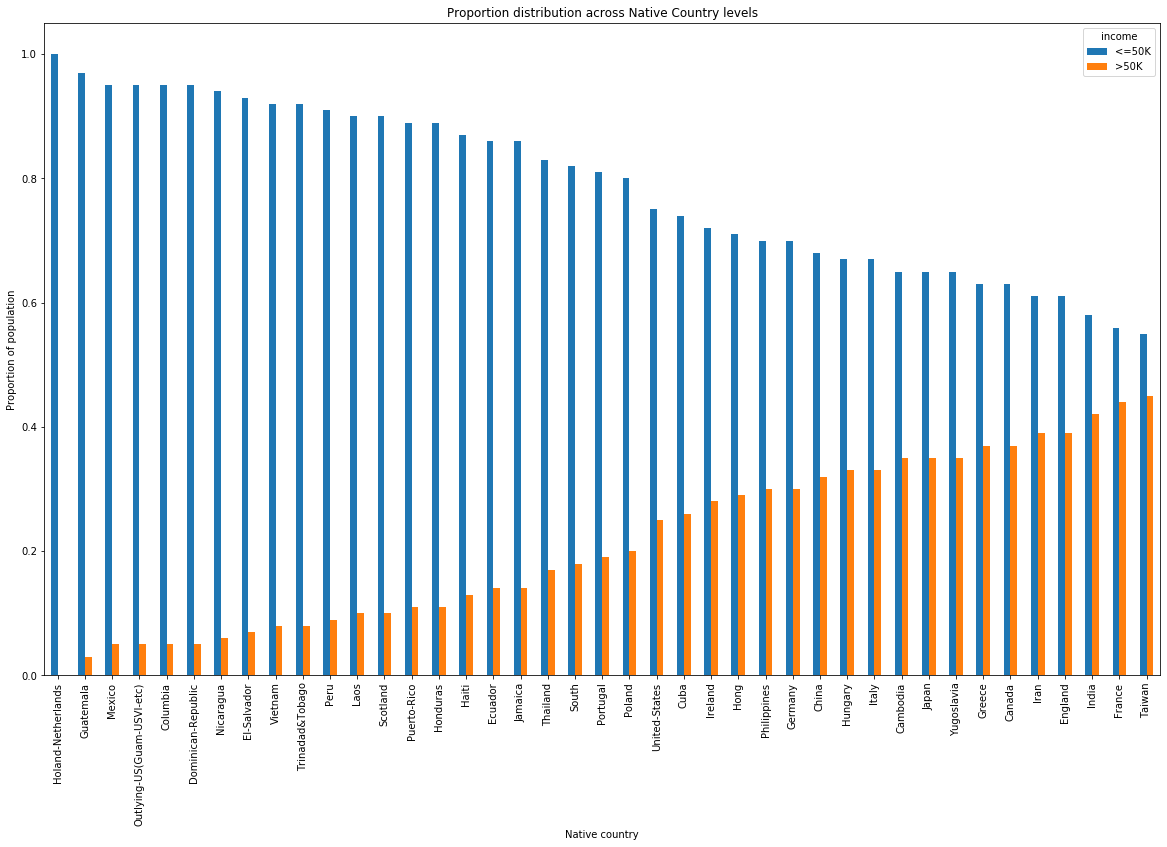

In [61]:
native_country = round(pd.crosstab(df_dataset['native_country'], df_dataset.income).div(pd.crosstab(df_dataset['native_country'], df_dataset.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')


Text(0, 0.5, 'Proportion of population')

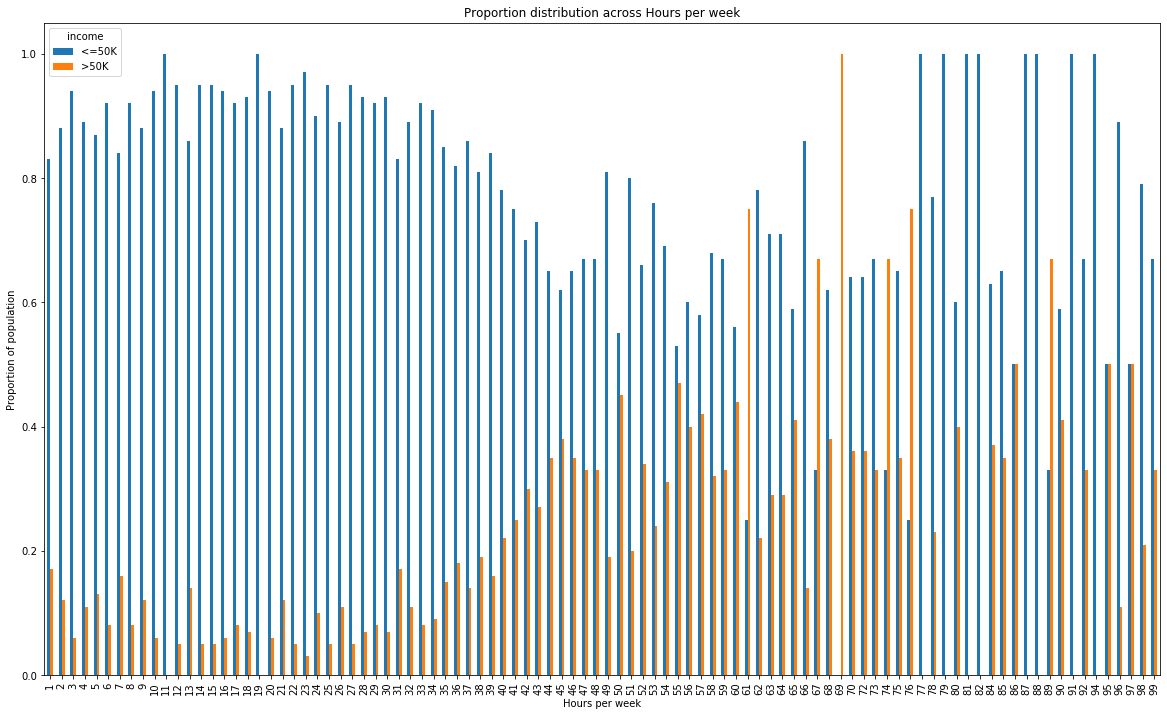

In [62]:
hours_per_week = round(pd.crosstab(df_dataset['hours_per_week'], df_dataset.income).div(pd.crosstab(df_dataset['hours_per_week'], df_dataset.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')


In [294]:
printmd('## Data preparation and model building')

## Data preparation and model building

In [129]:
#  Data Prep
adult_data = df_dataset.drop(columns = ['income'])
adult_label = df_dataset.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('object'))
adult_non_cat = adult_data.select_dtypes(exclude = 'object')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')


In [133]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)

In [135]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

In [136]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [302]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 84.72 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8472,0.7244,0.6157,0.6656,0.6157,0.9232,0.1528
